# Introduction to Structural Mechanics ME-104
__Studio 03) Introduction to sympy__

Instructors: [Pedro Reis](mailto:Pedro.Reis@epfl.ch), [Till Junge](mailto:till.junge@epfl.ch)

## Learning goals:
- symbolic calculations in Python
  - Learn to write equations in sympy
  - Solve systems of equations in sympy


## `sympy` Tutorial
### Systems of scalar equations

The `sympy` module allows you to write algebraic expressions and manipulations in python. This way, you can obtain analytic solutions with a much lower chance of calculation errors than when calculating by hand. This notebook is a tutorial to get started with a few basic uses of the `sympy` module. For a full documentation, please refer to [the official documentation](https://docs.sympy.org/latest/index.html).

We will solve Problem S3.7 (from Studio 03) as a tutorial run. Let's start by importing `sympy`:

In [1]:
import sympy as sy

`sympy` also has a powerfull pretty-printing engine that displays mathematical expressions in the very readable way you are used to from textbooks. You can activate it as follows:

In [2]:
sy.init_printing()

The problem we are trying to solve is shown in the figure below:   

The symmetrical gantry has a negligible mass and is loaded by a horizontal force $ P $. Determine the maximum allowable horizontal load given that the maximum total force supported by joint $A$ is $ A_{\max{}} $. The numerical values of all parameters are given as $A_{\max{}} = 20$ kN, $a = 6$ m, $b = 4$ m,
  $ c = 1 $ m.

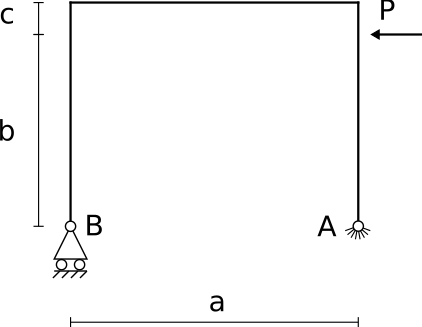

The support in $B$ is a roller and therefore has a vertical reaction force $B_y$ and the horizontal reaction $B_x=0$ while the pin in support $A$ has both a horizontal reaction force $A_x$ and the vertical reaction $A_y$:

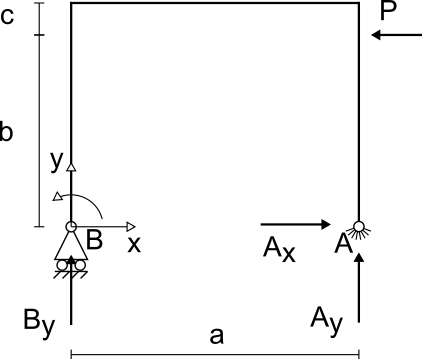

We start by defining known parameters of our problem. Here, these are $a$, $b$, $c$, and $A_\max{}$

In [3]:
a, b, c, Amax = sy.symbols("a, b, c, A_max", positive=True) 
display((a, b, c, Amax))

We used the function `symbols` to define multiple variables at once. Note that we also qualified the variables by telling sympy that these values are positive (this also implies that they are not complex). This is called _Assumptions_ and using them will make sure that solvers only return valid solutions. Another useful assumption is for instance `real=True` for any number with a zero imaginary part. 

We continue by setting our unknowns. In this problem, these are $A_x$, $A_y$, $B_y$, and $P$. For these, we do not _a priori_ know that they are positive, but we know that they are real.

In [4]:
Ax, Ay, By, P = sy.symbols("A_x, A_y, B_y, P", real=True)
display((Ax, Ay, By, P))

Let us start by expressing the equilibrium conditions for this problem. We do this using the `Eq` function, which define an equation:

In [5]:
Fx = sy.Eq(Ax - P, 0)        # sum of forces in x-direction
Fy = sy.Eq(By + Ay, 0)       # sum of forces in y-direction
Mb = sy.Eq(a * Ay + b*P, 0)  # sum of moments about point B
equilibrium_conditions = [Fx, Fy, Mb]
display(equilibrium_conditions)

In `sympy`, solving such a set of equations is as simple as calling the `solve` function. This function takes as first argument the equation or system of equations to solve, followed by the unknowns to solve for, and finally some optional argument we will discuss next.

In [6]:
#                             ------------------------------------- system of equations
#                             |                  ------------------ unknowns to solve for
#                             |                  |           ------ optional arguments
#                   ----------------------  ----------       |         
#                   |                    |  |        |       |
solution = sy.solve(equilibrium_conditions, Ax, Ay, By, dict=True)
display(solution)

Let's take a moment to understand what happened in this previous cell. We asked `sympy` to solve the system of equations stored in variable `equilibrium_conditions` for the variables `Ax`, `Ay`, and `By`. As a result, we obtained a list (indicated by the squeare brackets `[]`) of dictionaries (indicated by the curly braces `{}`).

There is only one dictionary in the solution list, which means that `sympy` found a single solution, which is exactly what we'd expect for a well-posed system of linear equations. This one solution is $A_x=P$, $A_y = -\frac{P\,b}a$ and $B_y = \frac{P\,b}a$.

The optional argument `dict=True` instructs `sympy` to return solutions as a list of dictionaries, which is more convenient than the standard set as a return type:

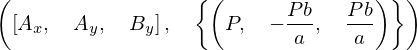

In [7]:
display(sy.solve(equilibrium_conditions, Ax, Ay, By, set=True))

It is therefore recommended to always use the `dict=True` argument with `solve`.

However, in this problem, the quantity we are asked to find is the maximum load $P$ at with we reach the maximum supported force $A_\max{}$ on joint $A$. So let's define this as an additional equation in the system of equations we are solving:

In [8]:
augmented_equations = [Fx, Fy, Mb, sy.Eq(Ax**2 + Ay**2, Amax**2) ]
display(augmented_equations)

Note that the augmented system of equations is no longer linear, but quadratic in $A_x$ and $A_y$. We proceed as before:

In [9]:
full_solutions = sy.solve(augmented_equations, Ax, Ay, By, P, dict=True)
display(full_solutions)

Since we are solving a quadratic problem, we obtain a list of 2 solution dictionaries, as expected. 

As a final step, we should evaluate this result numerically. `sympy` makes this very convevient. We start by defining variables for the physical units and then create a dictionary linking our problem's variables to their numerical values:

In [10]:
newton, metre = sy.symbols(r"\mathrm{N}, \mathrm{m}", positive=True)

numeric_values = {
    a: 6*metre,
    b: 4*metre,
    c: 1*metre,
    Amax: 20000*newton}
display(numeric_values)

These numeric values can be subsituted in the results using the `subs` method and then evaluated into a floating point number using the `evalf` method. For example, if we wanted to evaluate the first solution of $ P $, we could write

In [11]:
print("P =")
#              ---------------------------------- select the first solution in the list
#              |  ------------------------------- select the solution for P from the dictionary
#              |  |            ------------------ substitute the numeric values
#              |  |            |             ---- evaluate numeric calculations
#              v  v            v             v
full_solutions[0][P].subs(numeric_values).evalf()

P =


You might wonder why the numeric evaluation in addition to the substitution is necessary. The reason is that sympy will keep rational values (ratios) exact, unless forces to evaluate them into (inexact) floating point numbers:

In [12]:
print("P =")
full_solutions[0][P].subs(numeric_values)

P =


If the exact, fractional answer is what you want, simply omit the `evalf` in the end. Note that the `Eq` function can be used for pretty printing of results, as well:

In [13]:
display(sy.Eq(P, full_solutions[0][P].subs(numeric_values).evalf()))

If we wish to inspect all results, we can use a loop to print them out:

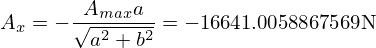

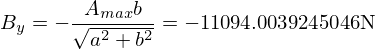

In [14]:
for parameter in [Ax, Ay, By, P]:
    sol = full_solutions[0][parameter]
    display(sy.Eq(parameter, sy.Eq(sol, sol.subs(numeric_values).evalf())))

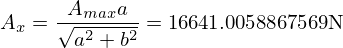

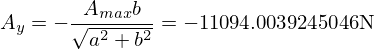

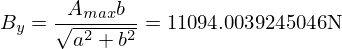

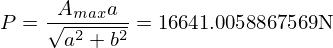

In [15]:
for parameter in [Ax, Ay, By, P]:
    sol = full_solutions[1][parameter]
    display(sy.Eq(parameter, sy.Eq(sol, sol.subs(numeric_values).evalf())))

Finally, we can state that there are 2 values of $ P $ for which the force in joint $ A $ reaches the maximum allowed value $ A_\max{} $:

$$ P_{\min{}/\max{}} = \pm 16.6 \mathrm{kN} $$

### Discussion

This example problem showed off some of `sympy`'s basic features. You have learned

 * How to define variables, and tell `sympy` what assumptions to make about them (real-values, positive, etc)
 * How to define systems of equations and how to solve them
 * That `sympy` will automatically try to find all possible solutions, so even if you forgot about the possibility of multiple solutions, `sympy` won't.
 * How to substitute numerical values into your symbolic solutions and evaluating them
 
Clearly, this was a small problem and could just as easily have been solved using pen and paper. As problems become larger, however (more equations), solving them correctly by hand becomes progressively less likely and more time-consuming. The `sympy` approach allows you to concentrate on the problem at hand, rather than the algebra involved.

### Vectorial equations

Vectorial calculations in `sympy` use the `Matrix` class. Consider the following problem:

A hatch is kept open at $ 30^\circ $ from the horizontal by a chain. Determine the literal expression of the component of string tension $ \boldsymbol{T} $ in direction on the $ CD $ axis and its moment relative to the hinge axis.

   Given: $ T=100 $ N, $ l=300 $ mm.
   
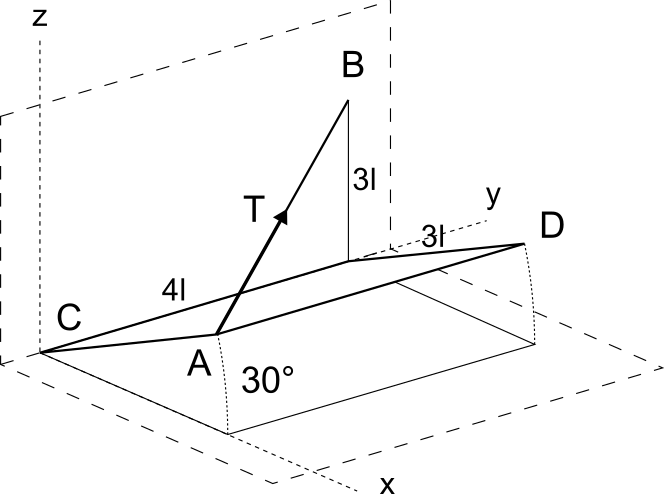

We start, as before, by defining our parameters

In [16]:
l, alpha, T = sy.symbols('l alpha, T', positive=True)

We proceeed by defining the position vectors of $A$, $B$, $C$, $D$ using the `Matrix` class.

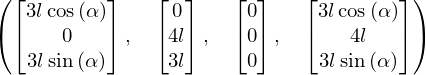

In [17]:
A = sy.Matrix([sy.cos(alpha), 0, sy.sin(alpha)])* 3 * l
B = sy.Matrix([0, 4 * l, 3 * l])
C = sy.Matrix([0,0,0])
D = sy.Matrix([sy.cos(alpha) * 3 * l, 4 * l, sy.sin(alpha) * 3 * l])
display((A, B, C, D))

Let's also define the direction vectors $\hat{\boldsymbol{n}}_{AB}$ and $\hat{\boldsymbol{n}}_{CD}$:

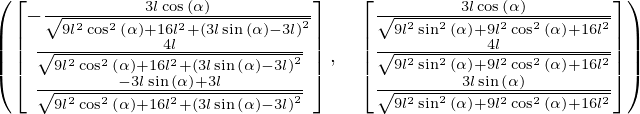

In [18]:
AB = B - A
n_AB = AB/AB.norm()

CD = D - C
n_CD = CD/CD.norm()
display((n_AB, n_CD))

The vector $ \boldsymbol{T}=T\hat{\boldsymbol{n}}_{AB} $ can now be projected onto the direction $\hat{\boldsymbol{n}}_{CD}$

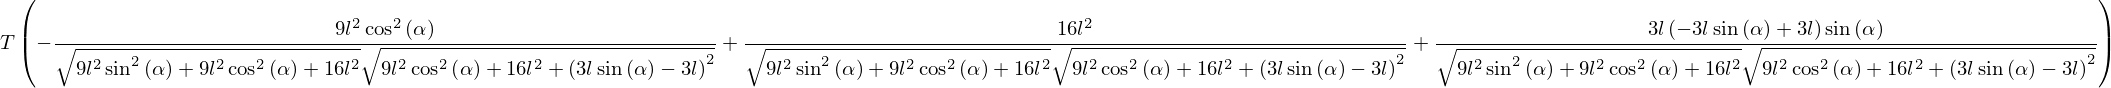

In [19]:
T_CD = T * n_AB.dot(n_CD)
display(T_CD)

This result looks complicated, let's ask `sympy` to `simplify` it for us:

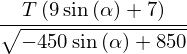

In [20]:
display(T_CD.simplify())

Much better. Now, we can substitute the numerical values and evaluate the result.

In [21]:
numeric_values = {
    l: .3 *metre,
    alpha: 30*sy.pi/180,
    T: 100 * newton
}

print("T =")
T_CD.subs(numeric_values).evalf()

T =


The moment about the hinge axis is $M_h=\left(\boldsymbol{A}\times\boldsymbol{T}\right)\cdot\hat{\boldsymbol{n}}_y$.

M_h =


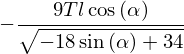

M_h =


In [22]:
M_h = (A.cross(T*n_AB)).dot(sy.Matrix([0, 1, 0]))
print("M_h =")
display(M_h.simplify())

print("M_h =")
display(M_h.subs(numeric_values).evalf())


### Discussion

You have solved a vectorial problem using `sympy`. You should have noticed that the expressions involved would have been quite cumbersome to manipulate by hand, but that this difficulty was entirely neutralised by using `sympy`.

## Jupyter Problem 3.1

This question was in the 2015 exam.

A mobile for a crib (see the diagram) is composed of a support rod ($OAB$, $r$ = 0.5 m)
  and cruciform carousel with radius $a$ = 0.1 m with negligible mass, from
  which four stuffed toys are suspended, each with concentrated mass of $m$ =
  0.25 kg . The mobile is supposed to be clamped to the crib at the point
  $O$. This clamping system can withstand limited moments in the $x$, $y$ and $z$
  directions $M_x^L = \pm$ 15 Nm and $M_y^L=M_z^L$ = $\pm$ 20 Nm.
  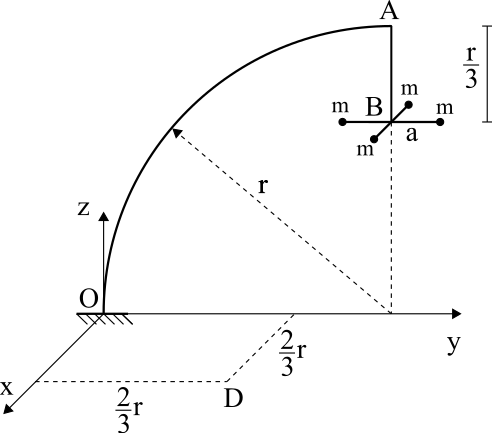

  * Determine the vectorial expression of the moment at the point $O$ and  check that it does not exceed the limits supported by the clamping system (3 points);
  *  Determine the vectorial expression of the moment at point $O$ when the baby pulls the mobile with a force $F$ in the direction $BD$, as well as the minimum value of $F$ that causes a rotation around one of the coordinate axes (7 points).
 
Note: For gravitational acceleration, use the symbol $g$ and the value of $10\frac{\mathrm{m}}{\mathrm{s}^2}$ .